In [1]:
import h5py
import numpy as np
import trsfile
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from src.data.loaders import aisy
from src.tools.cache import cache_np
from src.tools.plotter import init_plots
from src.tvla.cri import rho_test, tvla_t_test

init_plots()

In [6]:
directory = "/data/AISy/"
filename = "SequenceAcquisition_AES_tvla5_10k + Convert Title.trs"

number_of_traces = 20000
first_sample = 0
number_of_samples = 22000

# byte 0: tvla byte (0 or 1)
# bytes 1 - 16: plaintext
# bytes 17 - 32: key
# maybe plaintext and key are opposite, please check by doing a simple CPA attack if you think is necessary
data_length = 33

with trsfile.open(directory + filename) as trs_file:
    num_traces = min(number_of_traces, len(trs_file))

    tvla_byte = np.zeros(num_traces, dtype=np.int8)
    plaintext, key = [np.zeros((num_traces, 16), dtype=np.uint8)] * 2
    traces = np.zeros((num_traces, 220000), dtype=np.uint8)

    for ix, trace in tqdm(enumerate(trs_file[:num_traces]), total=num_traces):
        traces[ix] = trace

100%|██████████| 10000/10000 [49:02<00:00,  3.40it/s]


In [7]:
TRACES = cache_np("aisy_traces", lambda: traces)

In [8]:
IN_FILE = h5py.File(aisy.aes.tvla, "r")
# TRACES = np.array(IN_FILE['traces_group/traces'], dtype=np.int8)
TVLA_BYTE = IN_FILE['traces_group/metadata']['tvla_byte'].astype(bool)[:, 0]
PLAINTEXT = IN_FILE['traces_group/metadata']['plaintext'].astype(int)
CIPHERTEXT = IN_FILE['traces_group/metadata']['ciphertext'].astype(int)
KEY = IN_FILE['traces_group/metadata']['key'].astype(int)

In [9]:
PVS = rho_test(TRACES, TVLA_BYTE)

Computing Correlation Coefficients: 100%|██████████| 220000/220000 [00:33<00:00, 6504.18it/s]


In [10]:
np.min(PVS[0])

0.0

[None]

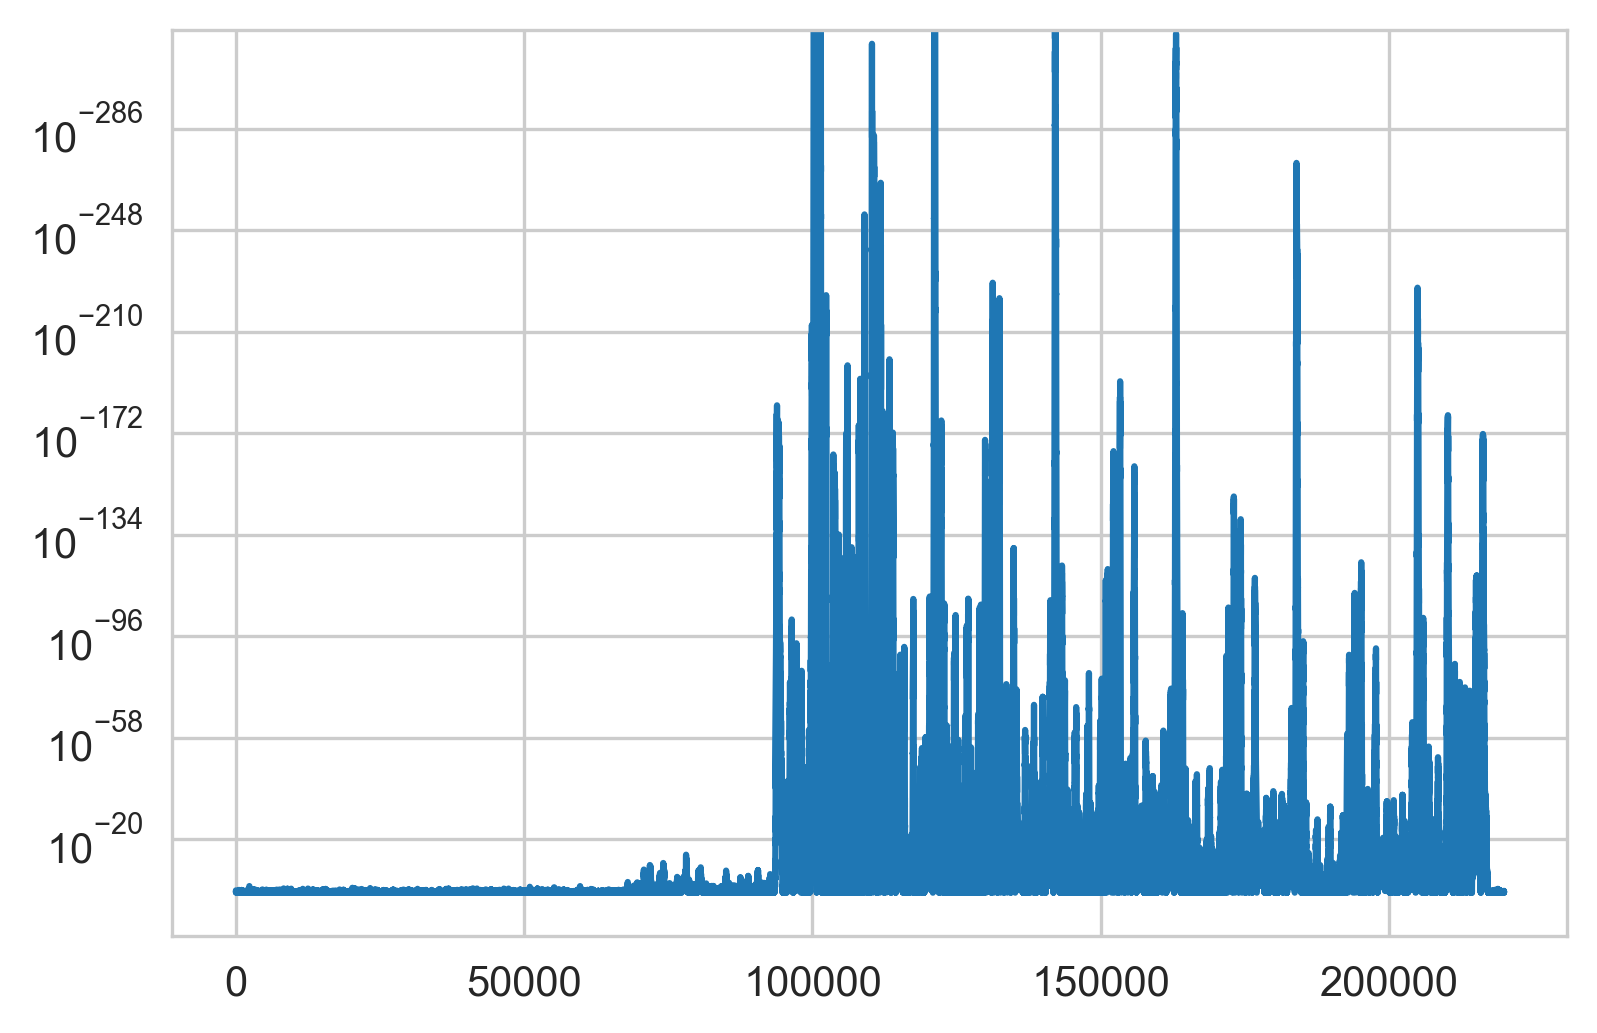

In [11]:
G = sns.lineplot(data=PVS[0])
G.invert_yaxis()
G.set(yscale="log")

In [ ]:
np.min(PVS)

In [ ]:
np.where(PVS < 10 ** -5)
